# Finding the Likelihood

### An Example

$p = .7$

$\prod_{i=1}^n p(x_i)$

In [ ]:
x = 1
p
x = 0 
1- p



$\prod_{i=1}^n p(x_i) = \prod_{i=1}^n p^x*(1 - p)^{1 - x} $

$n \choose k$ $ \prod_{i=1}^n p^x*(1 - p)^{1 - x} $

Let's say that we observe a basketball player make his first 4 of 5 shots.  Now from here, we cannot simply say his probability of making a particular shot is .8.  


For example, let's calculate the likelihood that we observe the sequence of makes and misses, when the probability is $.2$.  If we do so, we get the following:

$L(X | \theta = .2) =$ 

In [ ]:
X = 

And we translate this procedure into a function, to calculate the likelihood of seeing given probability.

In [15]:
events = [1, 1, 1, 1, 0]

In [5]:
import numpy as np
def likelihood(events, p):
    probs_of_each = [p**(event)*(1 - p)**(1 - event) for event in events]
    return np.prod(probs_of_each)

In [24]:
from scipy.special import comb
comb(5, 4)*likelihood([1, 1, 1, 1, 0], .2)
# 0.0012800000000000005

0.006400000000000003

$f(X|\theta) = \prod_{i = 1}^n p(x_i | \theta) $

The sole difference, is that instead of being given the probability and calculating the probability of future events, here we are given past events, and calculating the likelihood of a given value of $\theta$.

### Finding the maximum likelihood

In [26]:
import numpy as np
probs = .05*np.arange(0, 21)
probs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [34]:
likelihoods = [comb(5, 4)*likelihood([1, 1, 1, 1, 0], p) for p in probs]

In [35]:
likelihoods[:3]

# [0.0, 5.937500000000002e-06, 9.000000000000003e-05]

[0.0, 2.968750000000001e-05, 0.00045000000000000015]

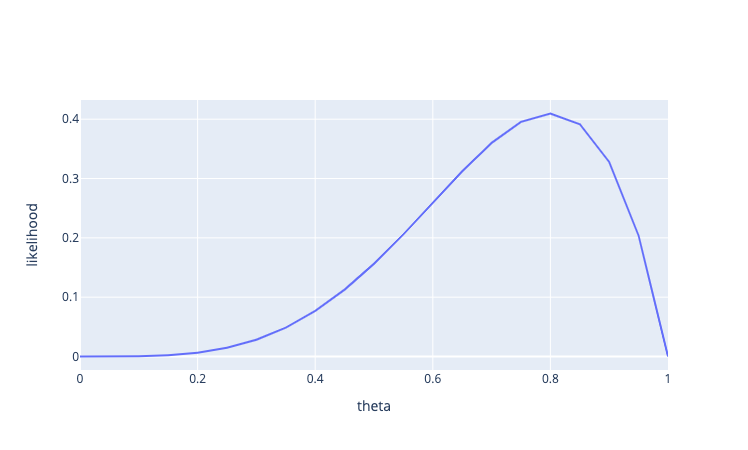

In [36]:
import plotly.graph_objects as go
scatter = go.Scatter(x = probs, y = likelihoods)
layout = {'title': '$L(X|p),   X = [1, 1, 1, 1, 0]$', 'xaxis': {'title': 'theta '}, 'yaxis': {'title': 'likelihood'}}
go.Figure(scatter,  layout = layout)

Or from Wikipedia: 

> In other words, when $f(x|\theta )$ is viewed as a function of $x$ **with $\theta$  fixed**, it is a probability density function, and when viewed as a function of $\theta$  **with $x$ fixed**, it is a likelihood function.

- [Likelihood Wikipedia](https://en.wikipedia.org/wiki/Likelihood_function#Likelihood_function_of_a_parameterized_model)

### Trying the binomial

Now above we found the likelihood of different probabilities, given that a *particular sequence* occurred.  Now if we want to find the likelihood of different probabilities for this number of positive events occurred.  We can just multiply by the different combination of sequences for this number of positive events.

In [11]:
def likelihood(events, p):
    probs_of_each = [p**(event)*(1 - p)**(1 - event) for event in events]
    return np.prod(probs_of_each)

So for example, above we saw a particular sequence of events that we calculated the likelihoods of the occurring if probability is .2.

In [16]:
events = [1, 1, 1, 1, 0]
likelihood(events, .6)

0.05184

In [21]:
5*likelihood(events, .6)

0.2592

In [31]:
from scipy.special import comb

likelihoods_diff_combs = [comb(5, 1)*likelihood([1, 1, 1, 1, 0], p) for p in probs]
likelihoods_diff_combs[:3]

[0.0, 2.968750000000001e-05, 0.00045000000000000015]

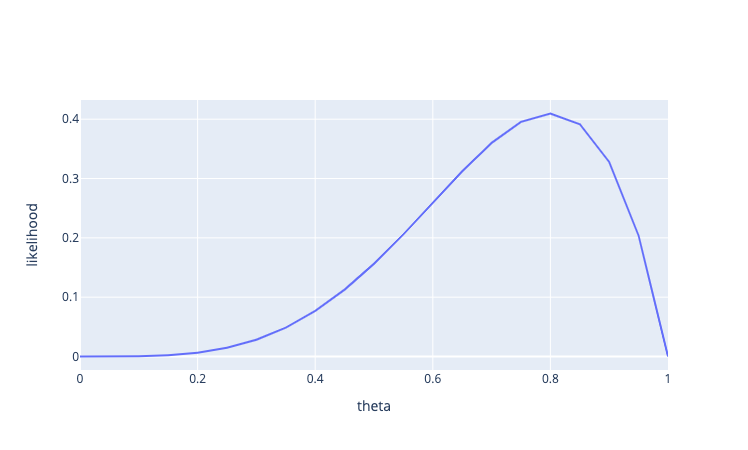

In [32]:
import plotly.graph_objects as go
scatter = go.Scatter(x = probs, y = likelihoods_diff_combs)
layout = {'title': '$L(X|p) \{1, 1, 1, 1, 0\}$', 'xaxis': {'title': 'theta '}, 'yaxis': {'title': 'likelihood'}}
go.Figure(scatter,  layout = layout)

In [ ]:
.2*.2*.2*.2*.8



So we can see that the shape of the likelihood binomial is precisely the same shape as for the bernoulli.  The only difference is that is that each number is multiplied by the of different ways our observed sequence `[1, 1, 1, 1, 0]` could occur, 5.

In [ ]:
# probs = .05*np.arange(0, 21)
likelihoods_diff_combs = [comb(5, 1)*likelihood([1, 1, 1, 1, 0], p) 
                          for p in probs]

### Maximum Likelihood

The *maximum likelihood* is the value of theta that yields the highest likehood given the evidence, which for a bernoulli random variable, $X_i \sim Ber(\theta)$ is:

$\theta_{MLE} = \underset {\theta}{argmax} \prod_{i = 1}^n \theta^{x_i}(1 - \theta)^{1 - x_i}$

> We substitute p for $\theta$, as that is the relevant parameter in a bernoulli random variable.

$\theta_{MLE} =  \underset {\theta}{argmax} $ $n \choose k $ $\prod_{i = 1}^n \theta^{x_i}(1 - \theta)^{1 - x_i}$